<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/LSTM_Recurrent_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import concat
pd.pandas.set_option('display.max_columns', None)
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense, Dropout

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)

Mounted at /content/drive


In [3]:
np.random.seed(7)

In [4]:
df.tail()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
754,2021-12-01,-0.000581,0.000152,-0.014204,-0.016180,-0.002908,-0.003690,-0.003185,-0.004600,-0.007810,-0.003700,-0.000271,-0.001934,0.005640,0.000472,-0.000646,-0.041442,-0.001826,-0.0704,0.001036,0.004182,-0.3,-0.5,-0.004038,-0.080679,-0.094070,-0.109199,-0.088131,-0.147525,0.003948,0.004505,0.015524,0.005848,0.003271,0.003974,0.002112,0.003858,0.002809,0.003223,0.002452,0.001581,0.001220,41.0,0.0,41.4,7.477604,4.948760,5.814131,6.803505,5.968708,0.009363,0.004988,0.000054,0.000043,0.000796,0.000008,0.000003,-0.011641,2.557936e-04,0.000029,0.001580,0.003381,0.00,0.01,0.08,0.12,0.03,-0.09,0.03,0.02,-0.02,0.07,0.22,1.15,1.38,2.56,3.22,-0.000326,-0.001160,-0.011956,0.018371,2.950021e-07,0.000001,4.563174e-07,0.002447,0.009745,0.000028,0.000121,0.000182,0.000008,0.000090,2.550850e-04,0.000012,0.000035,0.000041,0.000036,0.000026,8.993908e-05,0.000022,0.000019,0.000044,0.000045,0.000033,1.621119e-04
755,2022-01-01,-0.004514,-0.001439,0.015326,0.026696,0.008402,0.008378,0.009043,0.013151,0.016676,0.012164,-0.004097,0.008431,-0.003326,-0.002387,-0.001003,0.095514,-0.031523,-0.1049,0.008547,0.007658,0.1,-4.0,0.200947,0.022657,-0.106238,0.045120,-0.171819,0.026039,0.003371,0.001545,0.000367,0.000795,0.002069,0.001279,0.003371,0.003665,0.006653,0.002189,0.007754,0.000226,0.000542,40.7,0.1,41.2,7.418181,4.653960,5.278115,6.823286,6.100319,0.030308,0.008853,0.000060,0.000067,0.001733,0.002442,0.006188,-0.078424,1.405405e-07,0.000012,-0.021831,-0.029218,0.00,0.09,0.18,0.25,0.31,0.29,0.28,0.28,0.07,0.25,0.47,1.46,1.68,2.85,3.50,-0.002065,0.008682,0.018766,-0.014004,2.525356e-04,0.000311,4.585131e-04,0.000817,0.022159,0.002389,0.000111,0.000019,0.000044,0.000060,1.347480e-04,0.000033,0.000037,0.000067,0.000041,0.000025,9.238973e-05,0.000057,0.000011,0.000026,0.000037,0.000028,2.951024e-04
756,2022-02-01,0.000923,0.002855,0.000771,0.016385,0.009944,0.011709,0.010630,0.006197,-0.017633,0.012781,0.018551,0.007740,0.026459,0.018774,0.013092,0.054318,0.046027,0.9868,0.001855,0.003481,-0.2,2.0,-0.125936,0.113418,-0.028319,-0.104544,0.006484,-0.154590,0.004757,0.005486,0.016725,0.007125,0.003966,0.002552,0.006289,0.004640,0.007415,0.004588,0.007057,0.003266,0.000451,41.4,0.2,41.6,7.482682,4.897840,5.455321,6.906755,6.016157,-0.007068,0.006494,0.000017,0.000018,-0.003743,0.000111,0.000301,0.058405,5.304387e-06,0.000030,-0.030600,-0.034044,0.00,0.18,0.31,0.45,0.27,0.17,0.32,0.39,0.25,0.56,0.92,1.73,1.85,3.17,3.89,0.004018,0.003918,-0.001107,0.007026,6.135935e-04,0.000895,2.299514e-04,0.009003,0.009289,0.002414,0.000052,0.000361,0.000003,0.000165,2.097007e-05,0.000023,0.000058,0.000086,0.000073,0.000028,2.994284e-06,0.000316,0.000006,0.000016,0.000026,0.000004,5.050268e-05
757,2022-03-01,-0.003473,-0.002641,0.004771,0.013984,0.008551,0.007037,0.008947,0.007514,0.033075,0.000455,0.014235,0.010444,0.004249,0.002654,0.008442,-0.041565,0.009613,0.6368,0.002546,0.004656,-0.2,-2.4,0.071524,-0.066615,-0.198121,-0.252481,-0.175529,-0.091216,0.002841,0.003210,0.006648,0.002626,0.003399,0.003181,0.003755,0.002781,0.002064,0.004258,0.001547,0.001348,0.000180,40.9,-0.2,41.5,7.454720,5.

In [5]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [6]:
df_for_training = df.drop(columns = ["sasdate", "S&P 500"]).astype(float)
df_for_training.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,4.337246e-04,0.000128,0.019023,-0

In [7]:
data = df.drop([0]).copy()

In [8]:
date = df["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-02-01
1,1959-03-01
2,1959-04-01
3,1959-05-01
4,1959-06-01
...,...
754,2021-12-01
755,2022-01-01
756,2022-02-01
757,2022-03-01


In [9]:
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.000000,0.000997,0.007930,9.099837e-06,0.000000,1.064486e-05,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000e+00,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,6.502945e-05
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.000000,0.001210,-0.005142,0.000000e+00,0.000009,0.000000e+00,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,2.741165e-05,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,5.224170e-04
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.000000,0.001350,-0.006414,0.000000e+00,0.000009,0.000000e+00,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000e+00,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,4.296503e-06
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.

In [10]:
df["S&P 500"]

0     -0.015400
1      0.025062
2      0.016599
3      0.014949
4     -0.008664
         ...   
754    0.001580
755   -0.021831
756   -0.030600
757   -0.010130
758    0.000007
Name: S&P 500, Length: 759, dtype: float64

In [11]:
check_stationarity(df["S&P 500"])

ADF Statistic: -10.872495
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Stationary


In [12]:
SP500 = df[["S&P 500", "sasdate"]].copy()

In [13]:
SP500.index = pd.DatetimeIndex(SP500["sasdate"])
SP500 = SP500.drop(columns = ["sasdate"])

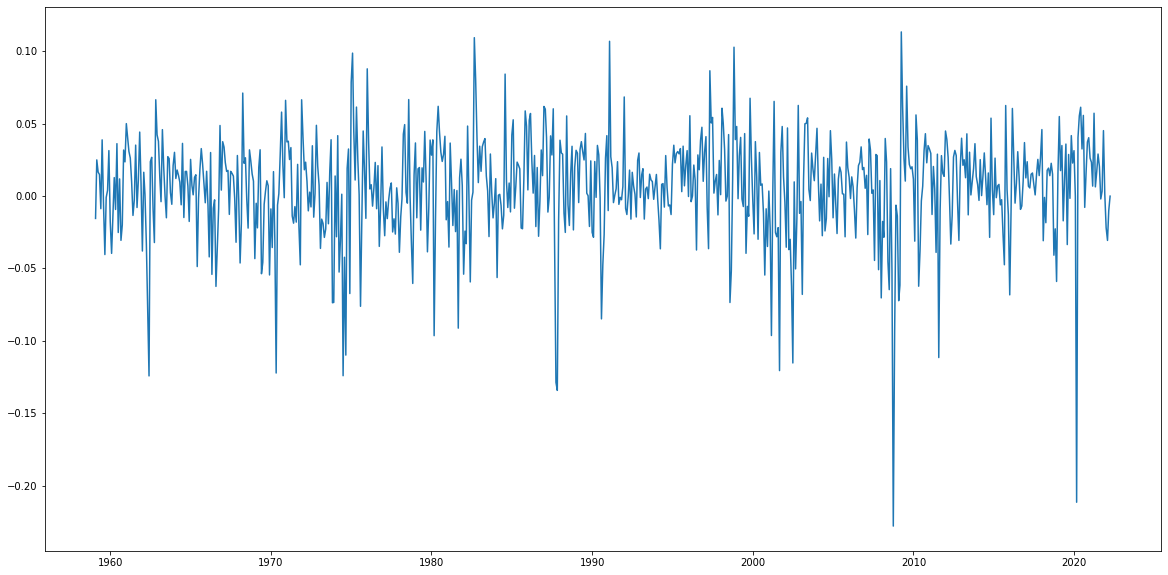

In [14]:
SP500_ts = pd.Series(SP500["S&P 500"].values, index = SP500.index)
plt.figure(figsize= (20, 10))
plt.plot(SP500_ts)

In [15]:
date = pd.to_datetime(date['sasdate'])

In [16]:
data = df.drop(columns = "sasdate")

In [17]:
scaler = StandardScaler()

In [18]:
scaler = scaler.fit(data)

In [19]:
data_scaled = scaler.transform(data)

In [20]:
data_scaled_df = pd.DataFrame(data_scaled, columns = data.columns)

In [21]:
data_scaled_df.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.108753,0.193562,0.906285,0.161174,1.707367,1.151007,0.606951,0.541669,0.089725,1.061595,0.574765,2.325363,2.270298,1.334713,1.395542,-0.140748,-0.711582,1.473572,-1.719649,-0.606667,-0.222685,-0.995103,-0.140188,-0.054051,-1.374970,-0.879938,-1.246649,-0.244371,0.435876,0.737191,-0.661589,-0.520252,1.304530,1.472560,0.716363,0.277450,0.505153,0.433536,0.651235,-0.402189,0.008629,-0.908214,0.685535,-0.649359,0.633027,1.881015,1.446880,-0.612814,0.148424,1.038608,1.902161,-0.037813,-0.218423,0.277758,-0.086924,-0.080486,-27.530701,-0.195793,0.480386,-0.592413,-0.630472,-0.093890,-0.282486,0.108417,0.445232,-0.153422,-0.213745,0.094239,0.095939,1.008121,1.322687,1.380759,0.604262,0.298716,-0.183077,-0.299519,0.092118,0.059267,0.094837,0.567731,-0.350499,-0.415806,-0.295964,-0.322231,-0.201620,-0.417696,-0.259931,-0.217557,-0.126316,-0.346203,-0.294505,-0.067196,-0.569049,-0.480675,-0.565944,-0.592796,-0.441422,-0.330370,-0.657015,0.027297,-0.264905,0.009232,-0.277180
1,0.314295,0.805891,0.794113,0.225183,1.205702,0.409174,0.263334,-0.148079,0.526654,-0.781797,0.428262,1.881006,1.926848,1.128073,1.162577,0.126967,1.123002,1.223722,1.597924,1.177636,-0.682598,-0.259318,-0.672497,-0.726567,-0.834694,-0.284563,-1.007970,-0.729684,0.800651,1.413254,0.008690,0.910968,1.584009,1.846090,0.714530,0.428629,0.770576,0.684929,1.179917,1.077470,0.188795,-0.446297,1.385833,-0.514180,0.539561,1.767141,1.140437,-0.645763,0.373668,0.458224,1.947346,-0.037966,-0.146578,0.630059,-0.142607,-0.083060,0.036270,-0.186568,-0.180714,0.540605,0.519294,0.742154,0.247390,0.006259,0.176042,0.100276,0.116070,-0.043845,-0.187950,0.621400,0.831357,0.984826,0.347091,0.084759,-0.383362,-0.504807,0.171571,0.059267,0.104817,-0.411547,-0.443636,-0.357585,-0.347469,-0.331927,-0.198712,-0.343660,-0.329700,-0.151631,-0.132908,-0.252255,0.110801,-0.582118,-0.569049,-0.480675,-0.565944,-0.612150,-0.399645,-0.327209,-0.611649,0.021405,-0.264905,1.638240,1.845300
2,0.319560,0.755110,-0.734699,-0.262504,1.873047,1.245056,1.153189,1.329008,0.125098,1.966452,1.293473,2.009796,1.443677,2.447149,1.645632,0.049761,-0.274919,1.792444,0.896288,0.977233,-0.912555,-0.504580,0.246066,-1.807515,-2.345879,-2.675905,-1.022843,-0.480079,0.734546,1.565780,0.101671,2.084792,1.378478,1.621424,0.571426,0.228695,0.320106,1.065194,-1.217424,0.885897,-0.028777,-0.138352,0.685535,-0.379000,0.478472,1.328636,1.008515,-0.434092,0.472665,0.179233,1.141424,-0.038051,-0.247585,0.004516,-0.125033,-0.080384,0.036572,0.013180,0.448071,0.303632,0.351946,0.324132,0.367816,0.363813,0.273929,0.417398,0.482532,0.462461,0.048624,0.607077,0.804799,0.918837,0.324399,0.065880,-0.414986,-0.579913,0.079809,0.059267,0.111423,-0.506767,-0.443636,-0.357585,-0.347469,-0.322312,-0.201620,-0.399300,-0.259931,-0.218006,-0.828364,-0.346203,-0.294505,-0.071654,-0.237926,-0.480675,-0.565944,-0.445200,-0.417462,-0.328473,-0.120463,0.015596,0.215642,-0.006663,-0.559007
3,0.259428,0.684474,1.098159,0.192411,1.269502,0.634015,0.695548,0.301886,0.549919,-0.168308,1.644432,1.864489,1.679620,0.622882,1.015658,0.349836,-0.978710,1.093242,-1.122051,-0.336124,-0

In [22]:
SP500_new = pd.DataFrame(data_scaled_df["S&P 500"].copy())
data_scaled_df = data_scaled_df.drop(columns = "S&P 500")
data_new = SP500_new.merge(data_scaled_df, left_index= True, right_index = True)
data_new.head()

,S&P 500,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.592413,0.108753,0.193562,0.906285,0.161174,1.707367,1.151007,0.606951,0.541669,0.089725,1.061595,0.574765,2.325363,2.270298,1.334713,1.395542,-0.140748,-0.711582,1.473572,-1.719649,-0.606667,-0.222685,-0.995103,-0.140188,-0.054051,-1.374970,-0.879938,-1.246649,-0.244371,0.435876,0.737191,-0.661589,-0.520252,1.304530,1.472560,0.716363,0.277450,0.505153,0.433536,0.651235,-0.402189,0.008629,-0.908214,0.685535,-0.649359,0.633027,1.881015,1.446880,-0.612814,0.148424,1.038608,1.902161,-0.037813,-0.218423,0.277758,-0.086924,-0.080486,-27.530701,-0.195793,0.480386,-0.630472,-0.093890,-0.282486,0.108417,0.445232,-0.153422,-0.213745,0.094239,0.095939,1.008121,1.322687,1.380759,0.604262,0.298716,-0.183077,-0.299519,0.092118,0.059267,0.094837,0.567731,-0.350499,-0.415806,-0.295964,-0.322231,-0.201620,-0.417696,-0.259931,-0.217557,-0.126316,-0.346203,-0.294505,-0.067196,-0.569049,-0.480675,-0.565944,-0.592796,-0.441422,-0.330370,-0.657015,0.027297,-0.264905,0.009232,-0.277180
1,0.540605,0.314295,0.805891,0.794113,0.225183,1.205702,0.409174,0.263334,-0.148079,0.526654,-0.781797,0.428262,1.881006,1.926848,1.128073,1.162577,0.126967,1.123002,1.223722,1.597924,1.177636,-0.682598,-0.259318,-0.672497,-0.726567,-0.834694,-0.284563,-1.007970,-0.729684,0.800651,1.413254,0.008690,0.910968,1.584009,1.846090,0.714530,0.428629,0.770576,0.684929,1.179917,1.077470,0.188795,-0.446297,1.385833,-0.514180,0.539561,1.767141,1.140437,-0.645763,0.373668,0.458224,1.947346,-0.037966,-0.146578,0.630059,-0.142607,-0.083060,0.036270,-0.186568,-0.180714,0.519294,0.742154,0.247390,0.006259,0.176042,0.100276,0.116070,-0.043845,-0.187950,0.621400,0.831357,0.984826,0.347091,0.084759,-0.383362,-0.504807,0.171571,0.059267,0.104817,-0.411547,-0.443636,-0.357585,-0.347469,-0.331927,-0.198712,-0.343660,-0.329700,-0.151631,-0.132908,-0.252255,0.110801,-0.582118,-0.569049,-0.480675,-0.565944,-0.612150,-0.399645,-0.327209,-0.611649,0.021405,-0.264905,1.638240,1.845300
2,0.303632,0.319560,0.755110,-0.734699,-0.262504,1.873047,1.245056,1.153189,1.329008,0.125098,1.966452,1.293473,2.009796,1.443677,2.447149,1.645632,0.049761,-0.274919,1.792444,0.896288,0.977233,-0.912555,-0.504580,0.246066,-1.807515,-2.345879,-2.675905,-1.022843,-0.480079,0.734546,1.565780,0.101671,2.084792,1.378478,1.621424,0.571426,0.228695,0.320106,1.065194,-1.217424,0.885897,-0.028777,-0.138352,0.685535,-0.379000,0.478472,1.328636,1.008515,-0.434092,0.472665,0.179233,1.141424,-0.038051,-0.247585,0.004516,-0.125033,-0.080384,0.036572,0.013180,0.448071,0.351946,0.324132,0.367816,0.363813,0.273929,0.417398,0.482532,0.462461,0.048624,0.607077,0.804799,0.918837,0.324399,0.065880,-0.414986,-0.579913,0.079809,0.059267,0.111423,-0.506767,-0.443636,-0.357585,-0.347469,-0.322312,-0.201620,-0.399300,-0.259931,-0.218006,-0.828364,-0.346203,-0.294505,-0.071654,-0.237926,-0.480675,-0.565944,-0.445200,-0.417462,-0.328473,-0.120463,0.015596,0.215642,-0.006663,-0.559007
3,0.257419,0.259428,0.684474,1.098159,0.192411,1.269502,0.634015,0.695548,0.301886,0.549919,-0.168308,1.644432,1.864489,1.679620,0.622882,1.015658,0.349836,-0.978710,1.093242,-1.122051,-0.

In [23]:
data_new.isnull().values.any()

False

In [24]:
data_new = data_new.reset_index(drop = True)

In [25]:
data_new.head()

,S&P 500,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.592413,0.108753,0.193562,0.906285,0.161174,1.707367,1.151007,0.606951,0.541669,0.089725,1.061595,0.574765,2.325363,2.270298,1.334713,1.395542,-0.140748,-0.711582,1.473572,-1.719649,-0.606667,-0.222685,-0.995103,-0.140188,-0.054051,-1.374970,-0.879938,-1.246649,-0.244371,0.435876,0.737191,-0.661589,-0.520252,1.304530,1.472560,0.716363,0.277450,0.505153,0.433536,0.651235,-0.402189,0.008629,-0.908214,0.685535,-0.649359,0.633027,1.881015,1.446880,-0.612814,0.148424,1.038608,1.902161,-0.037813,-0.218423,0.277758,-0.086924,-0.080486,-27.530701,-0.195793,0.480386,-0.630472,-0.093890,-0.282486,0.108417,0.445232,-0.153422,-0.213745,0.094239,0.095939,1.008121,1.322687,1.380759,0.604262,0.298716,-0.183077,-0.299519,0.092118,0.059267,0.094837,0.567731,-0.350499,-0.415806,-0.295964,-0.322231,-0.201620,-0.417696,-0.259931,-0.217557,-0.126316,-0.346203,-0.294505,-0.067196,-0.569049,-0.480675,-0.565944,-0.592796,-0.441422,-0.330370,-0.657015,0.027297,-0.264905,0.009232,-0.277180
1,0.540605,0.314295,0.805891,0.794113,0.225183,1.205702,0.409174,0.263334,-0.148079,0.526654,-0.781797,0.428262,1.881006,1.926848,1.128073,1.162577,0.126967,1.123002,1.223722,1.597924,1.177636,-0.682598,-0.259318,-0.672497,-0.726567,-0.834694,-0.284563,-1.007970,-0.729684,0.800651,1.413254,0.008690,0.910968,1.584009,1.846090,0.714530,0.428629,0.770576,0.684929,1.179917,1.077470,0.188795,-0.446297,1.385833,-0.514180,0.539561,1.767141,1.140437,-0.645763,0.373668,0.458224,1.947346,-0.037966,-0.146578,0.630059,-0.142607,-0.083060,0.036270,-0.186568,-0.180714,0.519294,0.742154,0.247390,0.006259,0.176042,0.100276,0.116070,-0.043845,-0.187950,0.621400,0.831357,0.984826,0.347091,0.084759,-0.383362,-0.504807,0.171571,0.059267,0.104817,-0.411547,-0.443636,-0.357585,-0.347469,-0.331927,-0.198712,-0.343660,-0.329700,-0.151631,-0.132908,-0.252255,0.110801,-0.582118,-0.569049,-0.480675,-0.565944,-0.612150,-0.399645,-0.327209,-0.611649,0.021405,-0.264905,1.638240,1.845300
2,0.303632,0.319560,0.755110,-0.734699,-0.262504,1.873047,1.245056,1.153189,1.329008,0.125098,1.966452,1.293473,2.009796,1.443677,2.447149,1.645632,0.049761,-0.274919,1.792444,0.896288,0.977233,-0.912555,-0.504580,0.246066,-1.807515,-2.345879,-2.675905,-1.022843,-0.480079,0.734546,1.565780,0.101671,2.084792,1.378478,1.621424,0.571426,0.228695,0.320106,1.065194,-1.217424,0.885897,-0.028777,-0.138352,0.685535,-0.379000,0.478472,1.328636,1.008515,-0.434092,0.472665,0.179233,1.141424,-0.038051,-0.247585,0.004516,-0.125033,-0.080384,0.036572,0.013180,0.448071,0.351946,0.324132,0.367816,0.363813,0.273929,0.417398,0.482532,0.462461,0.048624,0.607077,0.804799,0.918837,0.324399,0.065880,-0.414986,-0.579913,0.079809,0.059267,0.111423,-0.506767,-0.443636,-0.357585,-0.347469,-0.322312,-0.201620,-0.399300,-0.259931,-0.218006,-0.828364,-0.346203,-0.294505,-0.071654,-0.237926,-0.480675,-0.565944,-0.445200,-0.417462,-0.328473,-0.120463,0.015596,0.215642,-0.006663,-0.559007
3,0.257419,0.259428,0.684474,1.098159,0.192411,1.269502,0.634015,0.695548,0.301886,0.549919,-0.168308,1.644432,1.864489,1.679620,0.622882,1.015658,0.349836,-0.978710,1.093242,-1.122051,-0.

In [26]:
data_new.shape

(759, 103)

In [27]:
data_new = data_new.to_numpy()

In [28]:
test_lenght = 181
train_lenght = len(data_new) - test_lenght

data_train = data_new[0:train_lenght, :]

data_test = data_new[train_lenght:len(data_new), :]
data_train.shape, data_test.shape

((578, 103), (181, 103))

In [29]:
trainX = []
trainY = []

n_future = 1 
n_past = 60

for i in range(n_past, len(data_train) - n_future +1):
    trainX.append(data_train[i - n_past:i, 1:data_train.shape[1]])
    trainY.append(data_train[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('X shape == {}.'.format(trainX.shape))
print('Y shape == {}.'.format(trainY.shape))

X shape == (518, 60, 102).
Y shape == (518, 1).


In [30]:
testX = []
testY = []

n_future = 1 
n_past = 60

for i in range(n_past, len(data_test) - n_future +1):
    testX.append(data_test[i - n_past:i, 1:data_test.shape[1]])
    testY.append(data_test[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('X shape == {}.'.format(testX.shape))
print('Y shape == {}.'.format(testY.shape))

X shape == (121, 60, 102).
Y shape == (121, 1).


In [31]:
from tensorflow import keras
from keras.regularizers import L1L2

In [32]:
model = Sequential()
model.add(LSTM(100, activation = "relu", input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation = "relu", return_sequences= False))
#model.add(Dropout(0.1))
model.add(Dense(trainY.shape[1]))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="Adam", loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           81200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
47/47 [==============================] - 8s 76ms/step - loss: 1.0205 - val_loss: 0.4722
Epoch 2/20
47/47 [==============================] - 3s 60ms/step - loss: 0.9113 - val_loss: 0.5299
Epoch 3/20
47/47 [==============================] - 3s 60ms/step - loss: 0.8635 - val_loss: 0.4834
Epoch 4/20
47/47 [==============================] - 3s 61ms/step - loss: 0.8530 - val_loss: 0.5994
Epoch 5/20
47/47 [==============================] - 3s 62ms/step - loss: 0.8439 - val_loss: 0.5317
Epoch 6/20
47/47 [==============================] - 3s 65ms/step - loss: 0.7928 - val_loss: 0.8185
Epoch 7/20
47/47 [==============================] - 3s 61ms/step - loss: 0.7530 - val_loss: 0.6699
Epoch 8/20
47/47 [==============================] - 3s 61ms/step - loss: 0.7176 - val_loss: 1.4964
Epoch 9/20
47/47 [==============================] - 3s 67ms/step - loss: 0.7630 - val_loss: 0.6619
Epoch 10/20
47/47 [==============================] - 3s 61ms/step - loss: 0.6517 - val_loss: 0.8053
Epoch 11/

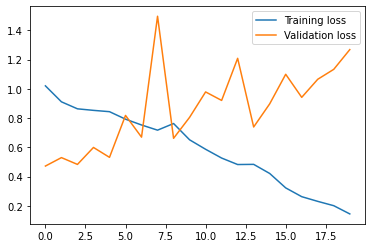

In [33]:
# fit the model
history = model.fit(trainX, trainY, epochs=20, batch_size=10, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [34]:
forecast_train = model.predict(trainX)

In [35]:
forecast_train_copies = np.repeat(forecast_train, data_scaled.shape[1], axis = -1)
forecast_train_real = scaler.inverse_transform(forecast_train_copies)[:, 0]
forecast_train_real

array([ 3.46692023e-03,  6.83106296e-03,  5.21734683e-03,  5.47068194e-03,
        7.44020683e-04,  9.85171739e-03, -4.74400679e-03,  9.48550832e-03,
        6.05833717e-03, -4.43153549e-03, -2.61583691e-03,  1.45353284e-02,
        4.64041624e-03, -2.77358992e-03,  3.80012742e-03,  7.44721061e-03,
       -1.38869323e-02,  5.26748924e-03,  6.02720445e-03,  9.59566422e-03,
        1.26413479e-02,  5.20214345e-03, -1.64545875e-03,  3.10412887e-03,
        4.20183875e-03, -1.79211758e-02,  1.92902982e-02, -2.53880788e-02,
        5.09567186e-03,  3.01390677e-03, -2.35370528e-02, -1.31902266e-02,
        1.37962739e-03,  2.12646034e-02, -8.33897968e-04,  1.72588993e-02,
        1.30428579e-02,  3.88425519e-03,  7.48031493e-03,  8.30402505e-03,
       -2.29413714e-03,  6.21284638e-03,  3.16486089e-03,  6.58659916e-03,
       -1.80445227e-03, -5.09096892e-04,  3.59455543e-03,  4.92181396e-03,
       -2.07805410e-02,  3.06896702e-03,  2.12835483e-02,  5.80981560e-03,
        1.17178122e-02,  

In [36]:
trainY_copies =  np.repeat(trainY, data_scaled.shape[1], axis = -1)
trainY_real = scaler.inverse_transform(trainY_copies)[:, 0]

In [37]:
forecast_test = model.predict(testX)

In [38]:
forecast_test_copies =  np.repeat(forecast_test, data_scaled.shape[1], axis = -1)
forecast_test_real = scaler.inverse_transform(forecast_test_copies)[:, 0]

In [39]:
testY_copies =  np.repeat(testY, data_scaled.shape[1], axis = -1)
testY_real = scaler.inverse_transform(testY_copies)[:, 0]

In [40]:
date.shape

(759,)

In [41]:
date_df = pd.DataFrame(date)
date_df.head()

,sasdate
0,1959-02-01
1,1959-03-01
2,1959-04-01
3,1959-05-01
4,1959-06-01


In [42]:
date_train = date_df.iloc[60:518+60, 0]
date_test = date_df.iloc[518+60+60:, 0]

In [43]:
date_test.head()

638   2012-04-01
639   2012-05-01
640   2012-06-01
641   2012-07-01
642   2012-08-01
Name: sasdate, dtype: datetime64[ns]

In [44]:
date_train.head()

60   1964-02-01
61   1964-03-01
62   1964-04-01
63   1964-05-01
64   1964-06-01
Name: sasdate, dtype: datetime64[ns]

In [45]:
date_train = date_train.reset_index(drop=True)
date_test = date_test.reset_index(drop=True)

In [46]:
forecast_train_real = pd.DataFrame(forecast_train_real)
trainY_real = pd.DataFrame(trainY_real)
trainY_real.shape, forecast_train_real.shape, date_train.shape

((518, 1), (518, 1), (518,))

In [47]:
forecast_test_real = pd.DataFrame(forecast_test_real)
testY_real = pd.DataFrame(testY_real)
testY_real.shape, forecast_test_real.shape, date_test.shape

((121, 1), (121, 1), (121,))

In [48]:
comparative_train = pd.merge(forecast_train_real, trainY_real, left_index = True, right_index = True)
comparative_train = comparative_train.rename(columns = {"0_x" : "forecast_train", "0_y" : "trainY"})
comparative_train = pd.merge(date_train, comparative_train, left_index = True, right_index = True)
comparative_train.index = pd.DatetimeIndex(comparative_train["sasdate"])
comparative_train = comparative_train.drop(columns = ["sasdate"])
comparative_train.head()

,forecast_train,trainY
sasdate,,
1964-02-01,0.003467,0.004810
1964-03-01,0.006831,0.006796
1964-04-01,0.005217,0.005539
1964-05-01,0.005471,0.003955
1964-06-01,0.000744,-0.001380


In [49]:
date_test = pd.DataFrame(date_test)

In [50]:
comparative_test = pd.merge(forecast_test_real, testY_real, left_index = True, right_index = True)
comparative_test = comparative_test.rename(columns = {"0_x" : "forecast_test", "0_y" : "testY"})
comparative_test = pd.merge(date_test, comparative_test, left_index = True, right_index = True)
comparative_test.index = pd.DatetimeIndex(comparative_test["sasdate"])
comparative_test = comparative_test.drop(columns = ["sasdate"])
comparative_test.head()

,forecast_test,testY
sasdate,,
2012-04-01,0.016086,-0.000039
2012-05-01,0.004767,-0.010623
2012-06-01,0.000719,-0.003895
2012-07-01,0.012785,0.009861
2012-08-01,0.010329,0.011410


In [51]:
date_test.shape, forecast_test_real.shape

((121, 1), (121, 1))

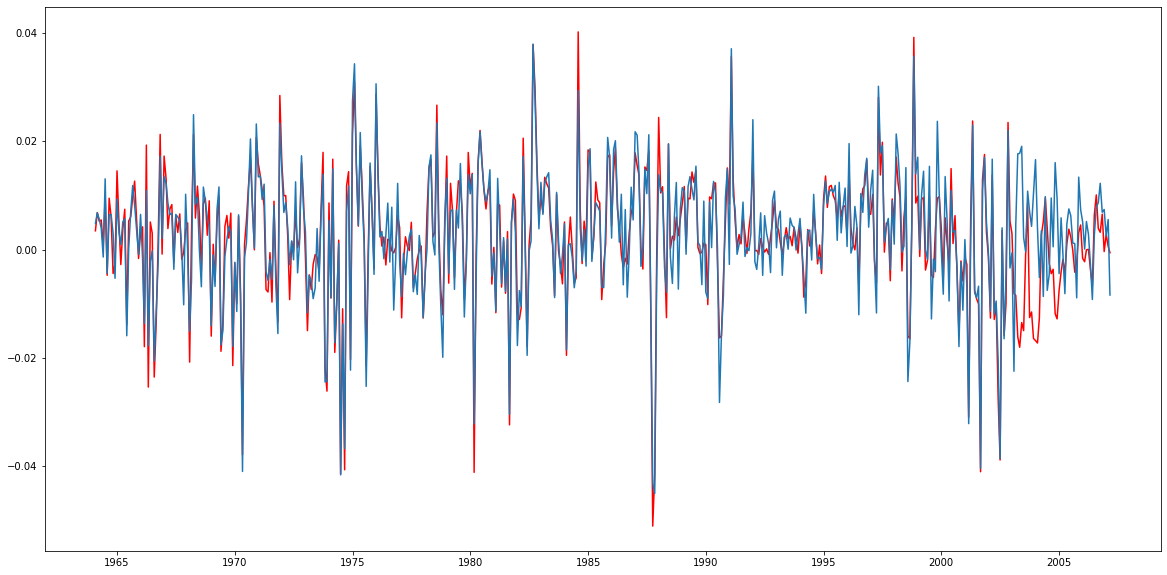

In [52]:
plt.figure(figsize= (20, 10))
plt.plot(comparative_train["forecast_train"], color = "red")
plt.plot(comparative_train["trainY"])
plt.show()

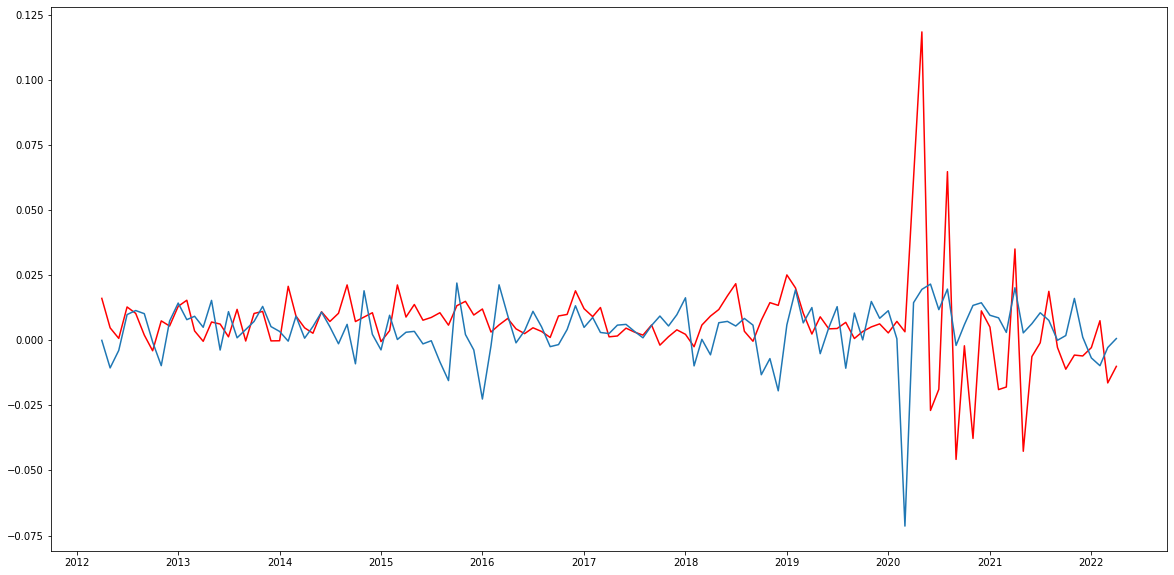

In [53]:
plt.figure(figsize= (20, 10))
plt.plot(comparative_test["forecast_test"], color = "red")
plt.plot(comparative_test["testY"])
plt.show()